In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc,precision_recall_curve,roc_curve
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 读入数据
car_data = pd.read_csv("../car_evaluation.csv",names=["buying","maint","doors","persons","lug_boot","safety","car_Eva"])

In [3]:
# 查看数据信息，发现所有的数据都是 object 类型，无法直接操作，需要对数据转换数据类型
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   car_Eva   1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [4]:
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,car_Eva
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
# 编码buying:{"vhigh":0,"high":1,"med":2,"low":3}
car_data["buying"]=car_data.buying.map({"vhigh":0,"high":1,"med":2,"low":3})

In [6]:
# 可以看到buying有1728个，数据类型是int类型，表示编码成功
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   int64 
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   car_Eva   1728 non-null   object
dtypes: int64(1), object(6)
memory usage: 94.6+ KB


In [7]:
# 查看maint的各value的数值
car_data.maint.value_counts()

vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64

In [8]:
# 对maint进行编码:{"vhigh":0,"high":1,"med":2,"low":3}
car_data["maint"] = car_data.maint.map({"vhigh":0,"high":1,"med":2,"low":3})

In [9]:
# 对doors进行编码:{"5more":0,"4":1,"3":2,"2":3}
car_data["doors"] = car_data.doors.map({"5more":0,"4":1,"3":2,"2":3})

In [10]:
# 对persons进行编码:{"more":0,"4":1,"2":2}
car_data["persons"] = car_data.persons.map({"more":0,"4":1,"2":2})

In [11]:
# 对lug_boot 进行编码：{"big":0,"med":1,"small":2 }
car_data["lug_boot"] = car_data["lug_boot"].map({"big":0,"med":1,"small":2
                                                })

In [12]:
# 对safety进行编码：{"high":0,"med":1,"low":2}
car_data["safety"] = car_data["safety"].map({"high":0,"med":1,"low":2})

In [13]:
# 对car_Eva进行编码：{"unacc":0,"acc":1,"good":1,"vgood":1}把不满意的都用0代替，满意的用1代替
car_data["car_Eva"] = car_data["car_Eva"].map({"unacc":0,"acc":1,"good":1,"vgood":1})

In [14]:
# 指定X数据集
X = car_data.drop("car_Eva",axis=1)

In [15]:
# 指定Y数据集
Y =car_data[["car_Eva"]]

In [16]:
# 进行数据集的划分
# train_test_split的返回值是四个，且返回是有顺序
X_train,x_test,Y_train,y_test = train_test_split(X,Y,test_size=0.7,random_state=1)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
clf = LogisticRegression(random_state=10,class_weight='balanced')

In [19]:
clf.fit(X_train,Y_train)

LogisticRegression(class_weight='balanced', random_state=10)

In [20]:
print("分类正确率：",round(clf.score(x_test,y_test),4))

分类正确率： 0.8488


In [21]:
y_pred = clf.predict(x_test)

In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [23]:
print("分类正确率:",round(accuracy_score(y_test,y_pred),4))

分类正确率: 0.8488


In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[724, 130],
       [ 53, 303]], dtype=int64)

In [25]:
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']

Text(0.5, 1.0, '混淆矩阵热力图')

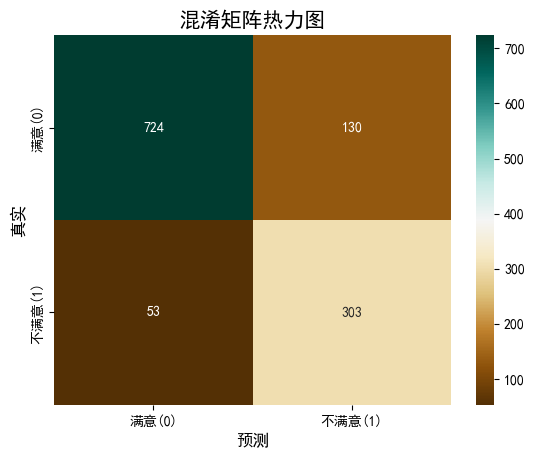

In [26]:
ax= sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d",cmap='BrBG',
           xticklabels=["满意(0)","不满意(1)"],
           yticklabels=["满意(0)","不满意(1)"])
ax.set_ylabel('真实',fontsize=12)
ax.set_xlabel("预测",fontsize=12)
ax.set_title("混淆矩阵热力图",fontsize=15)

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       854
           1       0.70      0.85      0.77       356

    accuracy                           0.85      1210
   macro avg       0.82      0.85      0.83      1210
weighted avg       0.86      0.85      0.85      1210



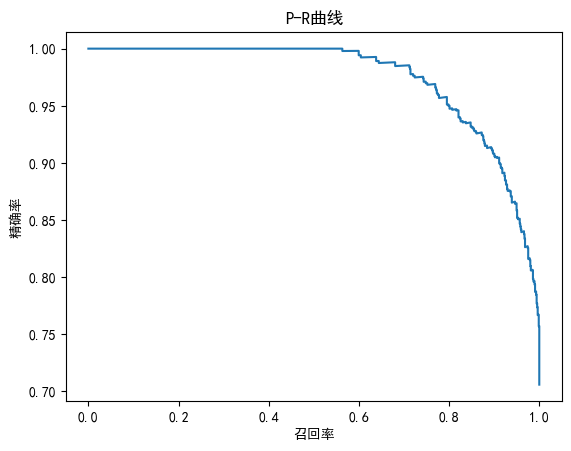

In [28]:
from sklearn.metrics import precision_recall_curve
probs = clf.predict_proba(x_test)[:,0]
precision,recall,thresholds = precision_recall_curve(y_test,probs,pos_label=0)
plt.plot(recall,precision)
plt.title("P-R曲线")
plt.xlabel("召回率")
plt.ylabel("精确率")
plt.show()

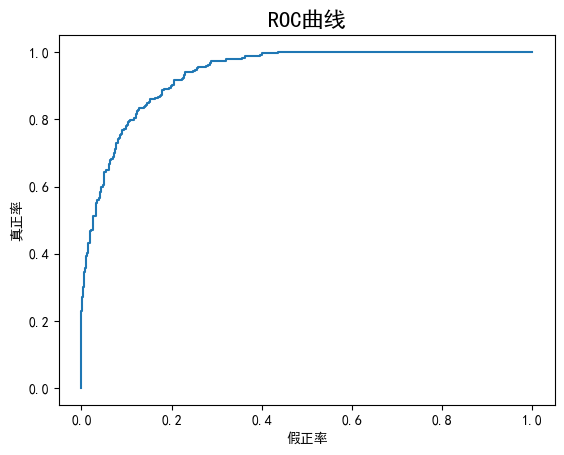

In [29]:
# roc 曲线 与 AUC
from sklearn.metrics import roc_curve
probs = clf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,probs)
plt.plot(fpr,tpr)
plt.xlabel("假正率")
plt.ylabel("真正率")
plt.title("ROC曲线",fontsize=16)
plt.show()

In [30]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,probs)

0.9362681893534722

In [31]:
from sklearn import metrics

In [32]:
metrics.auc(fpr,tpr)

0.9362681893534722

# 对数损失函数

In [33]:
from sklearn.metrics import log_loss

In [34]:
print("损失函数:",log_loss(y_test,probs))

损失函数: 0.32341415069941093


In [35]:
print("损失函数的总和：",log_loss(y_test,probs,normalize=False))

损失函数的总和： 391.3311223462872


In [36]:
from sklearn.svm import SVC
from sklearn.metrics import hinge_loss
ksvm = SVC(random_state=10)
ksvm.fit(X_train,Y_train)

SVC(random_state=10)

In [37]:
pred_decision = ksvm.decision_function(x_test)
print("合页损失:",hinge_loss(y_test,pred_decision))

合页损失: 0.14070257071814235


# 回归指标

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,median_absolute_error

In [39]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [40]:
pred_y = lr.predict(x_test)
pred_y_train = lr.predict(X_train)

In [41]:
print("训练集的均方误差: ", round(mean_squared_error(Y_train, pred_y_train),3))
print("训练集的平均绝对误差: ", round(mean_absolute_error(Y_train, pred_y_train),3))
print("训练集的中值绝对误差: ", round(median_absolute_error(Y_train, pred_y_train),3))
print("训练集的决定系数: ", round(metrics.r2_score(Y_train, pred_y_train),3))
print("-"*30)
print("测试集的均方误差: ", round(mean_squared_error(y_test, pred_y),3))
print("测试集的平均绝对误差: ", round(mean_absolute_error(y_test, pred_y),3))
print("测试集的中值绝对误差: ", round(median_absolute_error(y_test, pred_y),3))
print("测试集的决定系数: ", round(metrics.r2_score(y_test, pred_y),3))

训练集的均方误差:  0.117
训练集的平均绝对误差:  0.289
训练集的中值绝对误差:  0.265
训练集的决定系数:  0.456
------------------------------
测试集的均方误差:  0.112
测试集的平均绝对误差:  0.281
测试集的中值绝对误差:  0.263
测试集的决定系数:  0.462


#  聚类分析指标

In [42]:
from sklearn.cluster import KMeans

In [43]:
model = KMeans(n_clusters=3,random_state=111).fit(car_data)

In [44]:
for i in np.arange(2,7):
    model = KMeans(n_clusters=i,random_state=111).fit(car_data)
    labels = model.labels_
    print('轮廓系数(k=%d):'%(i),round(silhouette_score(car_data,labels),3)

SyntaxError: unexpected EOF while parsing (2923967391.py, line 4)

# 交叉验证

In [50]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

In [52]:
kf = KFold(n_splits=3,shuffle=True)
skf = StratifiedKFold(n_splits=3,shuffle=True)

In [53]:
kf.split(X,Y)

<generator object _BaseKFold.split at 0x000002560EAC3660>

In [54]:
skf.split(X,Y)

<generator object _BaseKFold.split at 0x000002560EA55A50>

In [55]:
from sklearn.model_selection import ShuffleSplit

In [56]:
rs = ShuffleSplit(n_splits=3,test_size=.2,random_state=0)

In [57]:
rs.split(X,Y)

<generator object BaseShuffleSplit.split at 0x000002560EACA900>

In [58]:
rs.get_n_splits()

3

In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [61]:
# 五折交叉验证返回5个正确率
print('Cross validation score is:',cross_val_score(LogisticRegression(),X,Y,cv=5))

Cross validation score is: [0.76589595 0.87283237 0.88439306 0.87826087 0.75072464]


In [62]:
# 十折交叉验证
print('Cross validation score is:',cross_val_score(LogisticRegression(),X,Y,cv=10))

Cross validation score is: [0.78034682 0.79768786 0.92485549 0.8150289  0.90751445 0.88439306
 0.93641618 0.83236994 0.89534884 0.70348837]


# 学习曲线

##### 学习曲线（learning curve）是关于模型在训练集和测试集上的预测性能曲线
##### 横轴为训练集的样本数量，纵轴为交叉验证的正确率
##### 能够判断模型的方差或偏差是否过高，以及增大训练集是否可以减小过拟合
![image.png](https://s2.loli.net/2022/11/19/3pReNGuvkCc9QAD.png)

![image.png](https://s2.loli.net/2022/11/19/CTPfJXsFZp57ERS.png)

In [63]:
# 可视化学习曲线
from sklearn.model_selection import learning_curve
# from sklearn.model_selection import 

In [64]:
estimator = LogisticRegression()

In [65]:
cv = ShuffleSplit(n_splits=100,test_size=.2,random_state=0)

In [66]:
learning_curve(estimator,X,Y,cv=cv,train_sizes=np.linspace(.1,1,5))

(array([ 138,  449,  760, 1071, 1382]),
 array([[0.86956522, 0.89130435, 0.87681159, 0.80434783, 0.85507246,
         0.9057971 , 0.87681159, 0.89855072, 0.8115942 , 0.88405797,
         0.88405797, 0.88405797, 0.89130435, 0.84782609, 0.93478261,
         0.87681159, 0.89130435, 0.89130435, 0.91304348, 0.89130435,
         0.81884058, 0.87681159, 0.89130435, 0.9057971 , 0.87681159,
         0.88405797, 0.86231884, 0.86956522, 0.79710145, 0.89130435,
         0.88405797, 0.88405797, 0.86956522, 0.89130435, 0.8115942 ,
         0.9057971 , 0.89855072, 0.9057971 , 0.84782609, 0.83333333,
         0.9057971 , 0.86956522, 0.91304348, 0.79710145, 0.92753623,
         0.89130435, 0.88405797, 0.88405797, 0.89855072, 0.83333333,
         0.88405797, 0.84057971, 0.86956522, 0.84782609, 0.84057971,
         0.84782609, 0.85507246, 0.85507246, 0.89855072, 0.86231884,
         0.86231884, 0.86956522, 0.87681159, 0.86231884, 0.85507246,
         0.85507246, 0.89130435, 0.83333333, 0.83333333, 0.8260

In [79]:
def plot_learning_curve(estimator,title,X,y,ylim=None,cv=None,n_jobs=1,
                        train_sizes=np.linspace(.05,1.,20),verbose=0):
    """
    画出car_data在模型上的leaening curve
    参数解释：
    estimator：分类器的使用
    title：表格的标题
    X：输入的feature,numpy类型
    y: 输入的targer vector
    ylim : tuple 格式的（ymin,ymax），设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation 的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为
    training(默认为3份
    n_jobs : 并行的的任务数(默认1)

    """
    train_sizes,train_scores,test_scores = learning_curve(estimator,X,y,cv=cv,n_jobs=n_jobs,
                                                         train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores,axis=1)
    train_scores_std = np.std(train_scores,axis=1)
    test_score_mean = np.mean(test_scores,axis=1)
    test_scores_std = np.std(test_scores,axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes,train_scores_mean-train_scores_std,
                    train_scores_mean+train_scores_std,alpha=0.1,
                    color = "r")
    plt.fill_between(train_sizes,test_score_mean-test_scores_std,
                    test_score_mean+test_scores_std,alpha=0.1,
                    color="g")
    plt.plot(train_sizes,train_scores_mean,'o-',color='r',label="Training score")
    plt.plot(train_sizes,test_score_mean,'o-',color='g',label="Cross-validation score")
    plt.legend(loc='best')
    return plt


    

<module 'matplotlib.pyplot' from 'C:\\Users\\morang\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

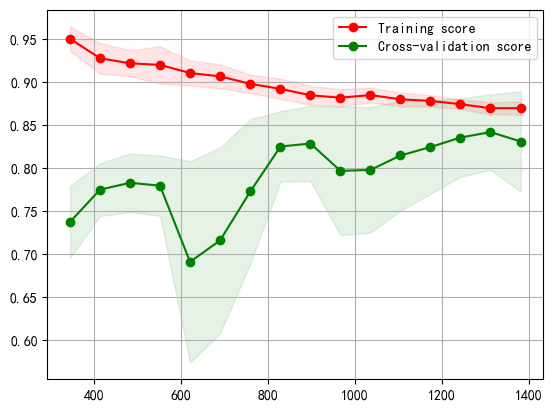

In [80]:
plot_learning_curve(estimator,u"学习曲线",X,Y)

# 参数调优

In [70]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100]}


In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, Y_train)
print("Test set score: {:.3f}".format(grid_search.score(x_test,
y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross validation score: {:.3f}".format(grid_search.best_score_))

Test set score: 0.979
Best parameters: {'C': 100, 'gamma': 0.1}
Best cross validation score: 0.985


## 使用随机网格搜索预测客户汽车满意度


In [73]:
from sklearn.model_selection import RandomizedSearchCV
import scipy
param = {'C': range(1,200,1), 'gamma':scipy.stats.expon()}
random_search = RandomizedSearchCV(SVC(), param, cv=5, n_iter=10)
random_search.fit(X_train, Y_train)
print("Test set score: {:.3f}".format(random_search.score(x_test, y_test)))
print("Best parameters: {}".format(random_search.best_params_))
print("Best cross validation score: {:.3f}".format(random_search.best_score_))


Test set score: 0.979
Best parameters: {'C': 160, 'gamma': 0.18595891901209294}
Best cross validation score: 0.986
